Cálculo de la transformada de Fourier de la señal de audio contenida en un archivo .wav.
Como ejemplo puede descargar sonidos de notas individuales de:
https://www.ee.columbia.edu/~dpwe/sounds/instruments/

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files #Comentar si está usando Jupyter local
from scipy.io import wavfile

#En este caso el archivo se encuentra en el disco duro local.
uploaded = files.upload() #Comentar si está usando Jupyter local


In [2]:
#Ejectutar este bloque si está usando Google colab
#Se lee el archivo usando scipy wavfile
for i in uploaded.keys():
  filename=i
samplerate, data = wavfile.read(filename) #ver: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

print('Sample frequency= ',samplerate,' Hz')
print('Number of samples= ',len(data))

Sample frequency=  11025  Hz
Number of samples=  11250


In [3]:
#Ejectutar este bloque si está usando Jupyter local
#Se lee el archivo usando scipy wavfile

filename="nota_Do_piano.wav"
samplerate, data = wavfile.read(filename) #ver: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

print('Sample frequency= ',samplerate,' Hz')
print('Number of samples= ',len(data))

Sample frequency=  11025  Hz
Number of samples=  19750


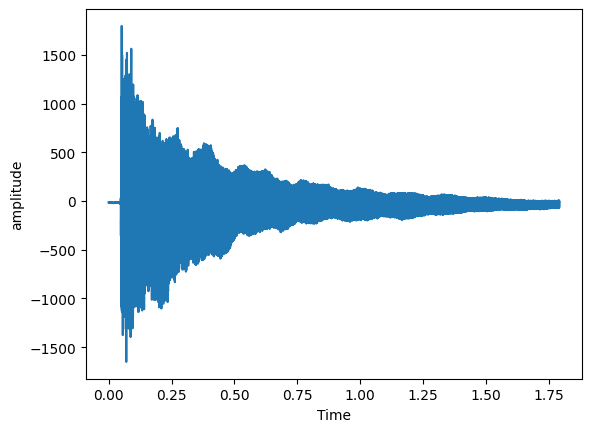

In [4]:
dt=1/samplerate #Tiempo entre datos
t_start=0
t_end=len(data)*dt

#Se generan los puntos de la señal y se grafica.
time=np.arange(t_start,t_end,dt)
signal=data
plt.plot(time,signal,'-')
plt.xlabel('Time')
plt.ylabel('amplitude')
plt.show()


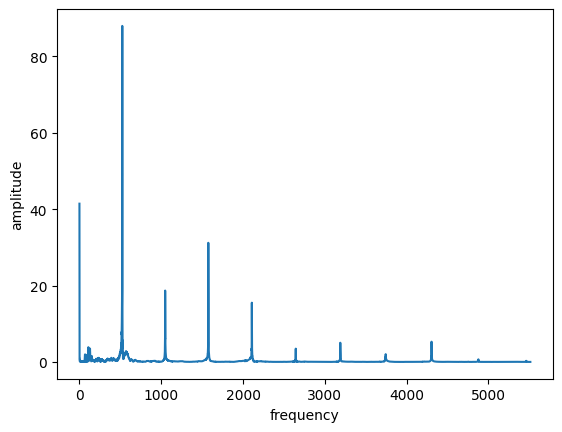

In [5]:
#Cálculo de la transformada de Fourier
signal_FFT=np.fft.fft(signal/len(signal)) #Señal dividida entre el número de muestras
signal_FFT=signal_FFT[range(int(len(signal)/2))] #Toma solo la mitad del arreglo de valores para omitir la frecuencia correspondiente al sample rate

#Cálculo de las frecuencias correspondientes a cada valor de la transformada.
indexes=np.arange(len(signal_FFT)) #Crea el arreglo de índices 0, 1, 2,... para los valores del arreglo "signal_FT"
time_duration=len(signal)/samplerate
frequencies=indexes/time_duration

plt.plot(frequencies,np.abs(signal_FFT))
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()

Ejercicios:
* Analizar el resultado con base en la ecuación para hallar la frecuencia de las notas musicales:
$$freq=freq_{base}*2^{N/12}$$ con $N$ el número de semitonos contados desde la nota con frecuencia $freq_{base}$. Es usual tomar $freq_{base}$=440 Hz (nota La4) (Ver imagen [Notas_musicales.png](https://drive.google.com/file/d/12kzyzyFdydGKgnCk9Dq956YBB7qBvshE/view?usp=sharing)).
*Analizar las frecuencias de un acorde.
*Comparar el número de frecuencias secundarias entre diferentes instrumentos y entre varias versiones del mismo instrumento (para la misma nota).
*Discutir la transmisión de información utilizando audiofrecuencia y cómo diferentes frecuencias podrían actuar como un canal de información binaria.
*Cuánto tiempo tardó el cálculo de la FFT en este caso? Según ese número sería posible hacer un programa para ver el espectro de frecuencias en tiempo real? (espectrograma).